# WiDS Datathon 2024 Challenge #2


## Dataset Description

- The WiDS Datathon 2024 centers on predicting a patient's Metastatic Diagnosis Period using a dataset of around 19,000 records, divided into training and test sets. 
- Each record represents a patient and includes characteristics such as age, race, BMI, and zip code; diagnosis and treatment information related to breast and metastatic cancer.
- geo-demographic data like income, education, rent, race, and poverty; and climate data linking health outcomes to external conditions. 
- The task involves utilizing these variables to predict the Metastatic Diagnosis Period in the test dataset. Participants are expected to handle messy data appropriately, reflecting real-world data scenarios.

1) The training dataset train.csv where the observed values of the outcome [Metastatic Diagnosis Period] for each row is provided.

2) The test dataset test.csv where we withhold the observed values of the outcome for each row

You are also provided with an example of a solution file prepared for submission.



#### Target

metastatic_diagnosis_period: This refers to the number of days from the initial breast cancer diagnosis to the diagnosis of metastatic cancer, indicating the progression of breast cancer to a metastatic state.

#### Columns & rows

1) Training dataset consists of 13173 rows and 152 columns
2) Test dataset consists of 5646 rows and  151 columns

#

In [211]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## To view max columns

pd.pandas.set_option('display.max_columns', None )

In [212]:
# import datasets

train =pd.read_csv('train.csv')
test  =pd.read_csv('test.csv')

In [213]:
train.head(2)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,C773,NaN,NaN,3924.87,82.63,42.58,11.61,13.03,10.87,11.80,12.29,13.22,13.47,10.07,3.64,51.43,48.57,51.05,16.72,23.57,8.66,3.01,43.99,44483.35,2.21,3.97,8.52,7.08,7.67,13.82,15.14,17.51,11.26,8.9,3.93,12.83,24048.55,72.11,1513.75,87384.33,641.39,27.52,16.55,41.83,28.31,9.21,4.11,13.32,38.78,53.60,5.85,11.82,5.31,92.95,1.73,0.33,0.20,0.03,0.83,3.94,3.03,22.24,19.27,0.42,25.35,8.06,8.11,38.55,39.88,42.75,55.16,65.17,75.98,76.75,76.45,73.67,59.73,45.18,37.43,31.67,33.83,42.35,57.72,67.35,75.92,74.28,79.59,70.84,62.39,41.89,41.46,35.24,31.10,45.50,60.94,68.49,77.69,81.35,76.28,73.32,60.32,51.0,48.37,35.76,42.89,53.21,61.07,66.29,82.78,81.52,79.52,75.61,65.76,53.85,39.56,41.59,49.01,52.28,63.40,67.11,75.78,80.58,76.16,72.91,62.68,49.73,39.80,31.71,41.69,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191
1,484983,White,NaN,IL,629,Midwest,East North Central,55,F,35.36,C50412,Malig neoplasm of upper-outer quadrant of left...,C773,NaN,NaN,2745.39,51.79,43.54,11.22,12.19,11.45,11.01,11.35,14.39,14.15,9.17,5.05,49.32,50.68,49.48,15.42,26.93,8.17,3.17,41.41,51796.79,3.67,3.86,6.58,5.58,5.38,11.02,13.09,19.56,11.76,11.4,8.11,19.51,28028.04,76.71,1113.35,92026.84,638.60,29.37,10.93,35.26,35.33,12.46,6.04,18.49,36.35,52.51,7.45,9.19,5.21,88.75,6.44,0.53,

In [214]:
test.head(2)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,730681,NaN,COMMERCIAL,LA,713,South,West South Central,55,F,NaN,1746,Malignant neoplasm of axillary tail of female ...,C7981,NaN,NaN,4639.07,72.66,41.50,11.40,13.44,11.42,11.45,12.56,13.08,14.26,7.71,4.73,50.02,49.98,42.37,14.70,34.76,8.18,3.30,38.83,40643.61,6.77,5.02,9.93,7.53,6.36,11.54,12.60,12.70,11.60,9.53,6.43,15.97,22663.32,74.78,1698.43,113973.9,671.07,37.23,21.30,36.81,26.95,9.74,5.21,14.94,38.47,49.41,8.08,12.89,4.88,66.51,29.06,0.4,0.37,0.10,0.66,2.91,2.52,20.33,27.62,0.55,29.71,8.18,5.79,51.34,53.19,54.23,64.00,72.08,81.10,80.89,82.15,79.95,68.38,53.90,48.64,42.32,48.58,54.30,64.82,71.66,80.19,80.20,81.40,77.97,68.84,52.59,52.09,46.08,46.21,58.97,69.57,74.68,80.54,84.27,86.11,78.99,69.81,62.72,58.46,47.79,54.72,63.75,72.19,73.58,80.75,86.61,83.09,80.58,71.67,62.00,52.89,56.28,60.76,63.94,69.87,71.66,78.19,82.68,80.93,76.97,68.88,61.15,49.82,42.66,58.12,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
1,334212,Black,NaN,NC,283,South,South Atlantic,60,F,40.0,C50912,Malignant neoplasm of unspecified site of left...,C773,NaN,NaN,10875.30,217.91,39.64,11.23,13.72,15.01,12.02,11.58,11.77,12.77,8.52,3.41,51.33,48.67,44.14,13.28,34.62,7.96,3.33,42.57,49924.38,4.59,3.83,6.58,5.27,5.90,13.16,13.99,18.14,10.65,11.39,6.49,17.88,26495.64,67.09,4034.71,119537.2,806.92,31.42,15.22,31.24,34.65,12.87,6.00,18.88,36.55,56.90,8.38,10.64,1.40,54.08,26.66,0.8,8.35,0.13,4.83,5.14,10.76,17.82,19.

In [215]:
print(train.shape, test.shape)

(13173, 152) (5646, 151)


##### Columns & rows

1) Training dataset consists of 13173 rows and 152 columns
2) Test dataset consists of 5646 rows and  151 columns

#

## Data Cleaning & Feature Engineering

- Drops columns with heavy missingness


<Axes: >

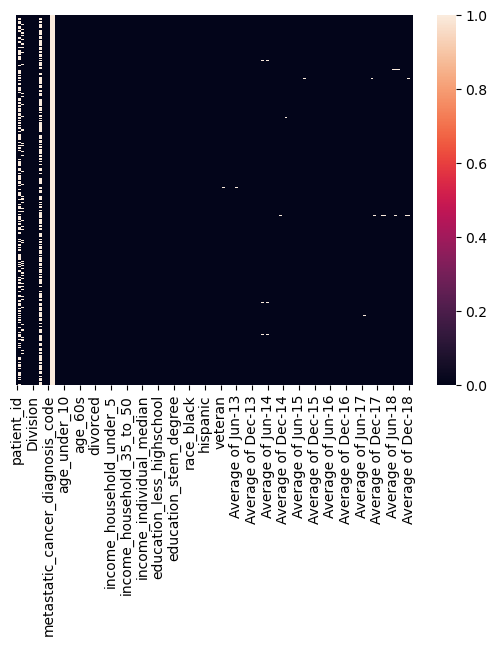

In [216]:
#plot heatmap to search null values

sns.heatmap(train.isnull(),yticklabels=False )

In [217]:
# identify categorical features
cat_features = [feature for feature in train.columns if train[feature].dtypes =='O']
print('Number of categorical feature : {} '.format(len(cat_features)), '\n',cat_features)

Number of categorical feature : 11  
 ['patient_race', 'payer_type', 'patient_state', 'Region', 'Division', 'patient_gender', 'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc', 'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type']


In [218]:
# identify numerical features
num_features = [feature for feature in train.columns if train[feature].dtypes !='O']
print('Number of categorical feature : {} '.format(len(num_features)), '\n',num_features)

Number of categorical feature : 141  
 ['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married', 'widowed', 'family_size', 'family_dual_income', 'income_household_median', 'income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15', 'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35', 'income_household_35_to_50', 'income_household_50_to_75', 'income_household_75_to_100', 'income_household_100_to_150', 'income_household_150_over', 'income_household_six_figure', 'income_individual_median', 'home_ownership', 'housing_units', 'home_value', 'rent_median', 'rent_burden', 'education_less_highschool', 'education_highschool', 'education_some_college', 'education_bachelors', 'education_graduate', 'education_college_or_above', 'education_

In [219]:
#let's find % of missing values of categorical features

for feature in train[cat_features]:
    print(f'{feature} has {train[feature].isnull().sum()} missing values')
    print(f'Missing value %: {train[feature].isnull().sum()/len(train)*100}%')
    print('------------------------------')

patient_race has 6657 missing values
Missing value %: 50.53518560692325%
------------------------------
payer_type has 1765 missing values
Missing value %: 13.398618386092764%
------------------------------
patient_state has 0 missing values
Missing value %: 0.0%
------------------------------
Region has 0 missing values
Missing value %: 0.0%
------------------------------
Division has 0 missing values
Missing value %: 0.0%
------------------------------
patient_gender has 0 missing values
Missing value %: 0.0%
------------------------------
breast_cancer_diagnosis_code has 0 missing values
Missing value %: 0.0%
------------------------------
breast_cancer_diagnosis_desc has 0 missing values
Missing value %: 0.0%
------------------------------
metastatic_cancer_diagnosis_code has 0 missing values
Missing value %: 0.0%
------------------------------
metastatic_first_novel_treatment has 13162 missing values
Missing value %: 99.91649586274957%
------------------------------
metastatic_fir

#### These features have huge amount of null values
patient_race has 6657 missing values
Missing value %: 50.53518560692325%

payer_type has 1765 missing values
Missing value %: 13.398618386092764%
    
metastatic_first_novel_treatment has 13162 missing values
Missing value %: 99.91649586274957%

metastatic_first_novel_treatment_type has 13162 missing values
Missing value %: 99.91649586274957%

In [220]:
#let's find % of missing values of numerical features

for feature in train[num_features]:
    print(f'{feature} has {train[feature].isnull().sum()} missing values')
    print(f'Missing value %: {train[feature].isnull().sum()/len(train)*100}%')
    print('------------------------------')

patient_id has 0 missing values
Missing value %: 0.0%
------------------------------
patient_zip3 has 0 missing values
Missing value %: 0.0%
------------------------------
patient_age has 0 missing values
Missing value %: 0.0%
------------------------------
bmi has 9071 missing values
Missing value %: 68.86054809079177%
------------------------------
population has 0 missing values
Missing value %: 0.0%
------------------------------
density has 0 missing values
Missing value %: 0.0%
------------------------------
age_median has 0 missing values
Missing value %: 0.0%
------------------------------
age_under_10 has 0 missing values
Missing value %: 0.0%
------------------------------
age_10_to_19 has 0 missing values
Missing value %: 0.0%
------------------------------
age_20s has 0 missing values
Missing value %: 0.0%
------------------------------
age_30s has 0 missing values
Missing value %: 0.0%
------------------------------
age_40s has 0 missing values
Missing value %: 0.0%
------

#### These features have huge amount of null values

bmi has 9071 missing values
Missing value %: 68.86054809079177%

#

In [221]:
# Here we are going to treat for null values of categorical features

# patient_race has 6657 missing values  50.53518560692325%
# payer_type has 1765 missing values 13.398618386092764%
# metastatic_first_novel_treatment has 13162 missing values  99.91649586274957%
# metastatic_first_novel_treatment_type has 13162 missing values  99.91649586274957%
    
columns_to_drop =['patient_race','payer_type' ,'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type']

# Dropping heavey missing value columns
train.drop(['patient_race','payer_type' ,'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type'], axis=1, inplace=True)

In [222]:
# update new categorical feature list

cat_features_new =[feature for feature in cat_features if feature not in columns_to_drop]
print(f'Length :{len(cat_features_new)}', cat_features_new)

Length :7 ['patient_state', 'Region', 'Division', 'patient_gender', 'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc', 'metastatic_cancer_diagnosis_code']


In [223]:
train.shape

(13173, 148)

In [224]:
train[cat_features_new].isnull().sum()

patient_state                       0
Region                              0
Division                            0
patient_gender                      0
breast_cancer_diagnosis_code        0
breast_cancer_diagnosis_desc        0
metastatic_cancer_diagnosis_code    0
dtype: int64

In [225]:
# Here we are going to treat for null values of numerical features

# bmi has 9071 missing values Missing value %: 68.86054809079177%

#filter null features from numerical features of train
null_num_values = [feature for feature in train[num_features] if train[feature].isnull().sum()>1]
len(null_num_values)


#null will be impute by mean of particular feature

for feature in null_num_values:
    train[feature]=train[feature].fillna(train[feature].mean())

<Axes: >

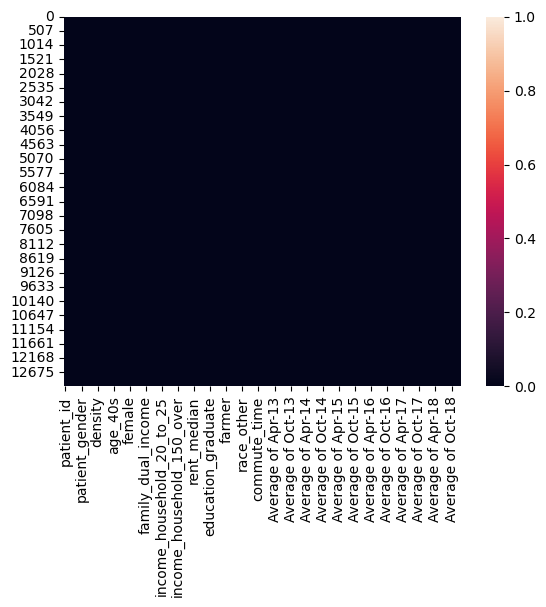

In [226]:
sns.heatmap(train.isnull())

In [227]:
# It seems all the null values has been desappeared

In [228]:
train.shape

(13173, 148)

#

In [229]:
#import modified test dataset

test =pd.read_csv('formulatedtest.csv')

test.head()

,patient_id,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,730681,LA,713,South,West South Central,55,F,29.142798,1746,Malignant neoplasm of axillary tail of female ...,C7981,4639.07,72.66,41.50,11.40,13.44,11.42,11.45,12.56,13.08,14.26,7.71,4.73,50.02,49.98,42.37,14.70,34.76,8.18,3.30,38.83,40643.61,6.77,5.02,9.93,7.53,6.36,11.54,12.60,12.70,11.60,9.53,6.43,15.97,22663.32,74.78,1698.43,113973.9,671.07,37.23,21.30,36.81,26.95,9.74,5.21,14.94,38.47,49.41,8.08,12.89,4.88,66.51,29.06,0.40,0.37,0.10,0.66,2.91,2.52,20.33,27.62,0.55,29.71,8.18,5.79,51.34,53.19,54.23,64.00,72.08,81.10,80.89,82.15,79.95,68.38,53.90,48.64,42.32,48.58,54.30,64.82,71.66,80.19,80.20,81.40,77.97,68.84,52.59,52.09,46.08,46.21,58.97,69.57,74.68,80.54,84.27,86.11,78.99,69.81,62.72,58.46,47.79,54.72,63.75,72.19,73.58,80.75,86.61,83.09,80.58,71.67,62.00,52.89,56.28,60.76,63.94,69.87,71.66,78.19,82.68,80.93,76.97,68.88,61.15,49.82,42.66,58.12,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
1,334212,NC,283,South,South Atlantic,60,F,40.000000,C50912,Malignant neoplasm of unspecified site of left...,C773,10875.30,217.91,39.64,11.23,13.72,15.01,12.02,11.58,11.77,12.77,8.52,3.41,51.33,48.67,44.14,13.28,34.62,7.96,3.33,42.57,49924.38,4.59,3.83,6.58,5.27,5.90,13.16,13.99,18.14,10.65,11.39,6.49,17.88,26495.64,67.09,4034.71,119537.2,806.92,31.42,15.22,31.24,34.65,12.87,6.00,18.88,36.55,56.90,8.38,10.64,1.40,54.08,26.66,0.80,8.35,0.13,4.83,5.14,10.76,17.82,19.78,2.10,25.95,13.60,12.58,45.78,43.22,45.83,61.17,67.66,76.35,78.99,76.54,75.13,62.32,49.83,47.81,37.63,44.48,46.54,61.77,7

In [230]:
test.shape

(5646, 147)

#

### Find inconsistancies

In [231]:
#Here we are going to find out inconsistancies
#get the intersection of both train and test dataframes
common_cat_feature =set(train.columns).intersection(set(test.columns))

#Iterate over common categorical features and compare unique values
for feature in common_cat_feature:
    if train[feature].dtype =='O' and test[feature].dtype =='O': #check both are attached to categorical
        print(f'{feature}')
        #print(f'Uniques values in train data: {train[feature].unique()}')
        #print(f'Uniques values in test data: {test[feature].unique()}')
        difference = len(train[feature].unique())-len(test[feature].unique())
        print(difference)

breast_cancer_diagnosis_desc
6
metastatic_cancer_diagnosis_code
5
patient_state
0
breast_cancer_diagnosis_code
6
Region
0
Division
0
patient_gender
0


#

## Handling Categorical varible

In [232]:
# filter categorical columns
columns = [feature for feature in common_cat_feature if train[feature].dtype =='O' and test[feature].dtype =='O' ]
columns

['breast_cancer_diagnosis_desc',
 'metastatic_cancer_diagnosis_code',
 'patient_state',
 'breast_cancer_diagnosis_code',
 'Region',
 'Division',
 'patient_gender']

In [233]:
# concatenate train and test datasets
final_df =pd.concat([train, test], axis=0)

In [249]:
final_df.head()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,Malig neoplasm of lower-inner quadrant of unsp female breast,Malig neoplasm of lower-outer quadrant of left female breast,Malig neoplasm of lower-outer quadrant of unsp female breast,Malig neoplasm of upper-inner quadrant of left female breast,Malig neoplasm of upper-inner quadrant of right male breast,Malig neoplasm of upper-inner quadrant of unsp female breast,Malig neoplasm of upper-outer quadrant of left female breast,Malig neoplasm of upper-outer quadrant of right male breast,Malig neoplasm of upper-outer quadrant of unsp female breast,Malig neoplm of lower-inner quadrant of right female breast,Malig neoplm of lower-outer quadrant of right female breast,Malig neoplm of upper-inner quadrant of right female breast,Malig neoplm of upper-outer quadrant of right female breast,Malignant neoplasm of axillary tail of female breast,Malignant neoplasm of axillary tail of left female breast,Malignant neoplasm of axillary tail of right female breast,Malignant neoplasm of axillary tail of unsp female breast,"Malignant neoplasm of breast (female), unspecified",Malignant neoplasm of breast of unspecified site,"Malignant neoplasm of breast of unspecified site, female","Malignant neoplasm of central portion of breast, female",Malignant neoplasm of central portion of female breast,Malignant neoplasm of central portion of left female breast,Malignant neoplasm of central portion of left male breast,Malignant neoplasm of central portion of right female breast,Malignant neoplasm of central portion of unsp female breast,"Malignant neoplasm of lower-inner quadrant of breast, female",Malignant neoplasm of lower-inne

In [235]:
final_df.shape

(18819, 148)

In [236]:
final_df['metastatic_diagnosis_period']

0       191.0
1        33.0
2       157.0
3       146.0
4       286.0
        ...  
5641      NaN
5642      NaN
5643      NaN
5644      NaN
5645      NaN
Name: metastatic_diagnosis_period, Length: 18819, dtype: float64

In [237]:
#handle categorical features usin one hot encodeing

def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [238]:
final_df= category_onehot_multcols(columns)

breast_cancer_diagnosis_desc
metastatic_cancer_diagnosis_code
patient_state
breast_cancer_diagnosis_code
Region
Division
patient_gender


In [239]:
final_df.head()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,Malig neoplasm of lower-inner quadrant of unsp female breast,Malig neoplasm of lower-outer quadrant of left female breast,Malig neoplasm of lower-outer quadrant of unsp female breast,Malig neoplasm of upper-inner quadrant of left female breast,Malig neoplasm of upper-inner quadrant of right male breast,Malig neoplasm of upper-inner quadrant of unsp female breast,Malig neoplasm of upper-outer quadrant of left female breast,Malig neoplasm of upper-outer quadrant of right male breast,Malig neoplasm of upper-outer quadrant of unsp female breast,Malig neoplm of lower-inner quadrant of right female breast,Malig neoplm of lower-outer quadrant of right female breast,Malig neoplm of upper-inner quadrant of right female breast,Malig neoplm of upper-outer quadrant of right female breast,Malignant neoplasm of axillary tail of female breast,Malignant neoplasm of axillary tail of left female breast,Malignant neoplasm of axillary tail of right female breast,Malignant neoplasm of axillary tail of unsp female breast,"Malignant neoplasm of breast (female), unspecified",Malignant neoplasm of breast of unspecified site,"Malignant neoplasm of breast of unspecified site, female","Malignant neoplasm of central portion of breast, female",Malignant neoplasm of central portion of female breast,Malignant neoplasm of central portion of left female breast,Malignant neoplasm of central portion of left male breast,Malignant neoplasm of central portion of right female breast,Malignant neoplasm of central portion of unsp female breast,"Malignant neoplasm of lower-inner quadrant of breast, female",Malignant neoplasm of lower-inne

In [240]:
final_df.shape

(18819, 332)

In [245]:
# Drop duplicated columns in final_df
final_df = final_df.loc[:, ~final_df.columns.duplicated()]

# Optional: Verify if there are no duplicated columns left
print(final_df.columns.duplicated().any())  # Should print False if no duplicates are left

False


In [246]:
final_df.shape

(18819, 332)

#

In [257]:
# Split train and test data from final_df

train_df =final_df.iloc[:13173,:]
test_df =final_df.iloc[13174:,:]

In [258]:
print('Shape of train:',train_df.shape, '\nShape of test:',test_df.shape)

Shape of train: (13173, 332) 
Shape of test: (5645, 332)


In [265]:
train_df.head(2)

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,Malig neoplasm of lower-inner quadrant of unsp female breast,Malig neoplasm of lower-outer quadrant of left female breast,Malig neoplasm of lower-outer quadrant of unsp female breast,Malig neoplasm of upper-inner quadrant of left female breast,Malig neoplasm of upper-inner quadrant of right male breast,Malig neoplasm of upper-inner quadrant of unsp female breast,Malig neoplasm of upper-outer quadrant of left female breast,Malig neoplasm of upper-outer quadrant of right male breast,Malig neoplasm of upper-outer quadrant of unsp female breast,Malig neoplm of lower-inner quadrant of right female breast,Malig neoplm of lower-outer quadrant of right female breast,Malig neoplm of upper-inner quadrant of right female breast,Malig neoplm of upper-outer quadrant of right female breast,Malignant neoplasm of axillary tail of female breast,Malignant neoplasm of axillary tail of left female breast,Malignant neoplasm of axillary tail of right female breast,Malignant neoplasm of axillary tail of unsp female breast,"Malignant neoplasm of breast (female), unspecified",Malignant neoplasm of breast of unspecified site,"Malignant neoplasm of breast of unspecified site, female","Malignant neoplasm of central portion of breast, female",Malignant neoplasm of central portion of female breast,Malignant neoplasm of central portion of left female breast,Malignant neoplasm of central portion of left male breast,Malignant neoplasm of central portion of right female breast,Malignant neoplasm of central portion of unsp female breast,"Malignant neoplasm of lower-inner quadrant of breast, female",Malignant neoplasm of lower-inne

In [266]:
test_df.head(2)

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,Malig neoplasm of lower-inner quadrant of unsp female breast,Malig neoplasm of lower-outer quadrant of left female breast,Malig neoplasm of lower-outer quadrant of unsp female breast,Malig neoplasm of upper-inner quadrant of left female breast,Malig neoplasm of upper-inner quadrant of right male breast,Malig neoplasm of upper-inner quadrant of unsp female breast,Malig neoplasm of upper-outer quadrant of left female breast,Malig neoplasm of upper-outer quadrant of right male breast,Malig neoplasm of upper-outer quadrant of unsp female breast,Malig neoplm of lower-inner quadrant of right female breast,Malig neoplm of lower-outer quadrant of right female breast,Malig neoplm of upper-inner quadrant of right female breast,Malig neoplm of upper-outer quadrant of right female breast,Malignant neoplasm of axillary tail of female breast,Malignant neoplasm of axillary tail of left female breast,Malignant neoplasm of axillary tail of right female breast,Malignant neoplasm of axillary tail of unsp female breast,"Malignant neoplasm of breast (female), unspecified",Malignant neoplasm of breast of unspecified site,"Malignant neoplasm of breast of unspecified site, female","Malignant neoplasm of central portion of breast, female",Malignant neoplasm of central portion of female breast,Malignant neoplasm of central portion of left female breast,Malignant neoplasm of central portion of left male breast,Malignant neoplasm of central portion of right female breast,Malignant neoplasm of central portion of unsp female breast,"Malignant neoplasm of lower-inner quadrant of breast, female",Malignant neoplasm of lower-inner quadrant of female breast,

In [263]:
#Drop the sales price from test_df

X_test = test_df.drop(['metastatic_diagnosis_period'], axis=1, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_17168\375609314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test = test_df.drop(['metastatic_diagnosis_period'], axis=1, inplace=True)


In [264]:
test_df.shape

(5645, 331)

In [268]:
#define dependent and independent varibles of train dataset

X_train =train_df.drop(['metastatic_diagnosis_period'], axis=1)
y_train =train_df['metastatic_diagnosis_period']

In [270]:
print(train_df.shape , X_train.shape, y_train.shape)

(13173, 332) (13173, 331) (13173,)


## Predicting and selecting the Algorithm

In [271]:
import xgboost
classifier =xgboost.XGBRegressor()

classifier.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [272]:
import pickle
filename ='finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [273]:
y_pred =classifier.predict(test_df)

In [274]:
y_pred

array([ 80.16465, 256.54852, 199.04237, ..., 137.48813,  58.94666,
        56.99101], dtype=float32)

In [303]:
#Create sample submission files
pred = pd.DataFrame(y_pred, columns=['metastatic_diagnosis_period'])
sub_df = pd.read_csv('solution_template.csv', na_values=['', 'NA', None])
datasets =pd.concat([sub_df['patient_id'],pred],axis=1)
#datasets.columns=['patient_id', 'metastatic_diagnosis_period']
datasets['metastatic_diagnosis_period'].fillna(-1, inplace=True)
datasets.to_csv('solution_template.csv',index=False)

C:\Users\hp\AppData\Local\Temp\ipykernel_17168\3204712701.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datasets['metastatic_diagnosis_period'].fillna(-1, inplace=True)


In [299]:
print(datasets.isna().sum())

patient_id                     0
metastatic_diagnosis_period    0
dtype: int64


In [300]:
df_sub =pd.read_csv('solution_template.csv')

In [301]:
df_sub.shape

(5646, 2)

In [302]:
df_sub.tail()

,patient_id,metastatic_diagnosis_period
5641,649011,88.41972
5642,869024,137.48813
5643,304800,58.94666
5644,267406,56.99101
5645,873886,-1.00000
